In [30]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [127]:
#meimport data
df = pd.read_csv('D:\Project\HF\heart_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [128]:
#Cek missing data
df.isnull().sum()

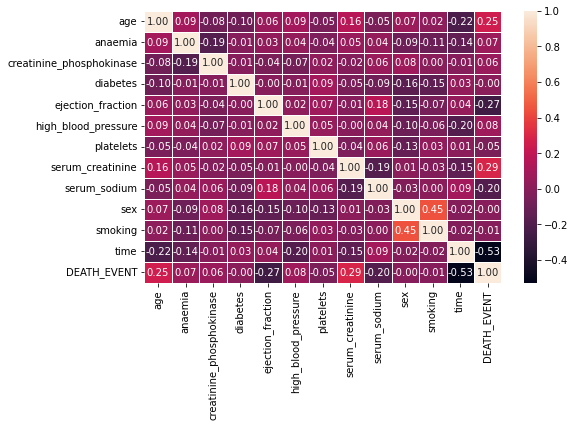

In [85]:
#Corellation Heatmap
f,ax=plt.subplots(figsize = (8,5))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidths = .5,ax=ax)
plt.show()

In [86]:
#Corelation dengan heart failure
df.corr()["DEATH_EVENT"].abs().nlargest(10)

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
Name: DEATH_EVENT, dtype: float64

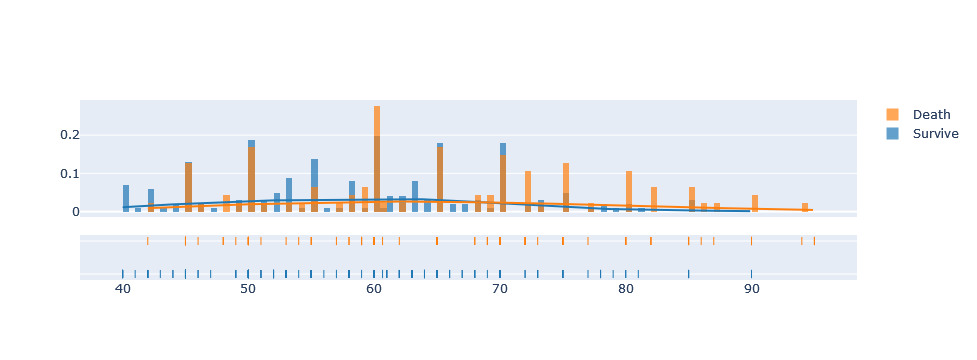

In [87]:
#Heart Failure dengan umur
surv = df[df["DEATH_EVENT"]==0]["age"]
death = df[df["DEATH_EVENT"]==1]["age"]
values=(surv,death)
labels=("Survive","Death")
fig = ff.create_distplot(values, labels, bin_size=0.5)
fig.show()

In [88]:
#Menentukan Features
features= ['time', 'serum_creatinine', 'ejection_fraction', 'age']
x = df[features].values
y = np.ravel(df.iloc[:,-1:].values)

#Memisahkan data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [89]:
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [90]:
#Logistic Regression

In [110]:
#Mencari akurasi Logistic Regression
log_r= LogisticRegression(random_state=0)
log_r.fit(X_train,y_train)
y_pred=log_r.predict(X_test)
cm_log=confusion_matrix(y_test,y_pred)
log_r_acc=accuracy_score(y_test, y_pred)
print("akurasi logistic regression:",log_r_acc)

akurasi logistic regression: 0.8181818181818182


In [111]:
#Mencari cv terbaik Logistic Regression
scores = []
for cv in range(2, 11):
        log_r_set =LogisticRegression()
        accuracies = cross_val_score(estimator=log_r_set, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("Nilai cv terbaik:", best_cv)

Nilai cv terbaik: 3


In [112]:
#Cross Validation Score
accuracies = cross_val_score(log_r_set, X=X_train,y=np.ravel(y_train), cv=3)
lr_score=np.mean(accuracies)
print("Cross Validation Score:", lr_score)

Cross Validation score: 0.8398160711593547


In [94]:
#Desicion Tree

In [113]:
#Mencari akurasi Decision Tree
dct = DecisionTreeClassifier(criterion="entropy")
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)
cm_dct=confusion_matrix(y_test,y_pred)
dct_acc = accuracy_score(y_test, y_pred)
print('{}-> {}'.format("Akurasi Decision Tree ",dct_acc))

Akurasi Decision Tree -> 0.797979797979798


In [118]:
#Mencari cv terbaik Decision Tree
scores = []
for cv in range(2, 11):
        dct = DecisionTreeClassifier(criterion="entropy")
        accuracies = cross_val_score(estimator=dct, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("Nilai cv terbaik:", best_cv)

Nilai cv terbaik: 5


In [119]:
#Cross Validation Score
accuracies = cross_val_score(estimator=dct, X=X_train,y=y_train, cv=5)
dct_score = np.mean(accuracies)
print("Cross Validation Score:", dct_score)

Cross Validation Score: 0.7899999999999999


In [98]:
#Random Forest

In [120]:
#Mencari estimator terbaik
n_estimators_list = list(range(1, 101))
scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

best_n_estimators=np.argmax(scores)+1
print("n_estimators parameter terbaik: ", best_n_estimators)

n_estimators parameter terbaik:  21


In [121]:
#Mencari akurasi Random Forest
rf = RandomForestClassifier(n_estimators=21, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm_rf=confusion_matrix(y_test,y_pred)
rf_acc = accuracy_score(y_test, y_pred)
print('{}-> {}'.format("Akurasi Random Forest: ",rf_acc))

Akurasi Random Forest: -> 0.8484848484848485


In [122]:
#Mencari cv terbaik Random Forest
scores = []
for cv in range(2, 11):
        rf = RandomForestClassifier(n_estimators=21, random_state=42)
        accuracies = cross_val_score(estimator=rf, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("Nilai cv terbaik:", best_cv)

Nilai cv terbaik: 6


In [123]:
#Cross Validation Score
rf = RandomForestClassifier(n_estimators=21, random_state=42)
accuracies = cross_val_score(estimator=rf, X=X_train,y=y_train, cv=6)
rf_score = np.mean(accuracies)
print("{}-> {}".format("Cross Validation Score: ",rf_score))

Cross Validation Score: -> 0.8394236482471777


In [129]:
#Perbandingan Ketiga Model
accuracy_scores = [log_reg_acc,dct_acc,rf_acc]
cross_acc= [lr_score,dct_score,rf_score]
models = ["Logistic Regression","Decision Tree","Random Forest"]

for i in range(0,3):
    print("------------")
    print(models[i])
    accuracy_scores[i] = accuracy_scores[i]*100
    cross_acc[i] = cross_acc[i]*100
    print("{}->{}".format("Accuracy Score ",accuracy_scores[i]))
    print("{}->{}".format("Cross-Validation Score ",cross_acc[i]))

------------
Logistic Regression
Accuracy Score ->81.81818181818183
Cross-Validation Score ->83.98160711593547
------------
Decision Tree
Accuracy Score ->79.7979797979798
Cross-Validation Score ->78.99999999999999
------------
Random Forest
Accuracy Score ->84.84848484848484
Cross-Validation Score ->83.94236482471777


<AxesSubplot:>

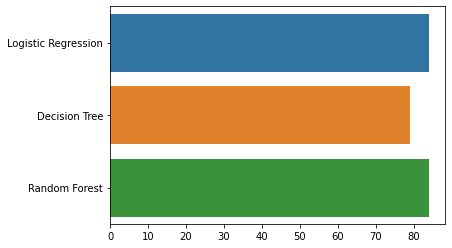

In [125]:
sns.barplot(x=cross_acc, y=models)

Text(946.764705882353, 0.5, 'y_true_rf')

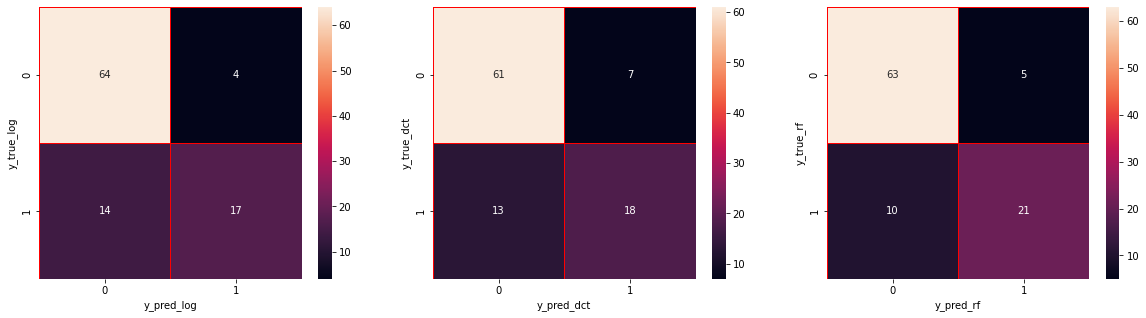

In [130]:
#Confusion matrix
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.heatmap(cm_log, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[0])
axes[0].set_xlabel("y_pred_log")
axes[0].set_ylabel("y_true_log")

sns.heatmap(cm_dct, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1])
axes[1].set_xlabel("y_pred_dct")
axes[1].set_ylabel("y_true_dct")

sns.heatmap(cm_rf, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[2])
axes[2].set_xlabel("y_pred_rf")
axes[2].set_ylabel("y_true_rf")

## 